# general imports

In [7]:
import numpy as np
import cv2
import pickle
import os
import matplotlib.pyplot as plt
from pykinect2 import PyKinectV2
from pykinect2 import PyKinectRuntime
import ipywidgets as wdg
import kinectmapper
from mapper import color_2_world
import pykinect2
from pykinect2.PyKinectV2 import _CameraSpacePoint

# opening camera 1 files

In [20]:
kinectColor = PyKinectRuntime.PyKinectRuntime(PyKinectV2.FrameSourceTypes_Color)
kinectDepth = PyKinectRuntime.PyKinectRuntime(PyKinectV2.FrameSourceTypes_Depth)
%matplotlib notebook
while True:
    if kinectColor.has_new_color_frame() and kinectDepth.has_new_depth_frame():
        colorFrame1 = kinectColor.get_last_color_frame() 
        colorFrame1 = colorFrame1.reshape((1080, 1920, 4))
        depthFrame1 = kinectDepth.get_last_depth_frame()
        print("acquired")
        break
    else:
        print("not available")
        os.system('cls')

not available
acquired


saving files

In [3]:
kinect = PyKinectRuntime.PyKinectRuntime(PyKinectV2.FrameSourceTypes_Color | PyKinectV2.FrameSourceTypes_Depth)

<IPython.core.display.Javascript object>


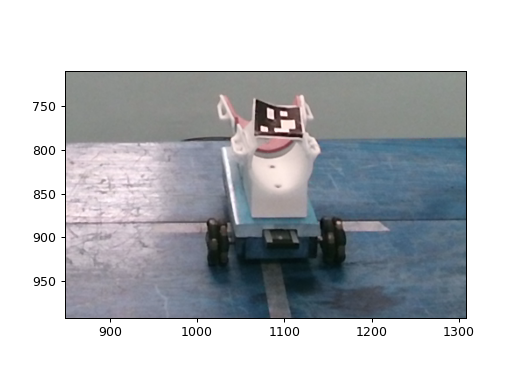

Textarea(value='', description='event:', placeholder='')

In [25]:
%matplotlib notebook

fig = plt.figure()
plt.imshow(colorFrame1)

txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)

global points_clicked
points_clicked = []

# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above
    xy = [int(event.xdata), int(event.ydata)]
    points_clicked.append(xy)

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

In [26]:
print(pos1)

[[1032, 605], [1091, 645], [1088, 711], [1171, 709]]


# this is from sivasirs function

In [27]:
#kinect depth points

oval1 = kinectmapper.PyKinectMapper().get_camspace_position(depthFrame1, pos1[1])
print(f"{oval1[0]},{oval1[1]},{oval1[2]}")

0.22281897068023682,-0.2015647143125534,2.1630001068115234


# this is from mapper function

In [28]:
dep1 = kinect._depth_frame_data
data = color_2_world(kinect, dep1, _CameraSpacePoint, True)
print(f"{data[pos1[1][1],pos1[1][0]]}")

[ 0.21671028 -0.20138729  2.161     ]
